In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.6 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import numpy as np

In [58]:
# Read the image using cv2

img = cv.imread('/content/drive/MyDrive/Face_recognition/Datasets/Sumit/IMG_20231216_183303158.jpg')
# opencv BGR channel format and plt reads images as RGB channel format

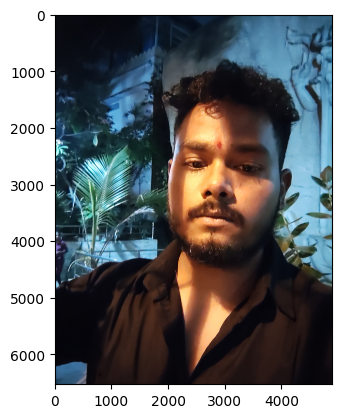

In [59]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [60]:
# Detect the image using mtcnn

from mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)
print(results)

1/1 [==============================] - 0s 150ms/step
[{'box': [2013, 1538, 1909, 2674], 'confidence': 0.999959409236908, 'keypoints': {'left_eye': (2516, 2639), 'right_eye': (3398, 2715), 'nose': (2868, 3089), 'mouth_left': (2487, 3639), 'mouth_right': (3222, 3710)}}, {'box': [251, 4660, 301, 363], 'confidence': 0.8885784149169922, 'keypoints': {'left_eye': (375, 4804), 'right_eye': (489, 4811), 'nose': (431, 4883), 'mouth_left': (358, 4935), 'mouth_right': (448, 4946)}}]


In [61]:
results

[{'box': [2013, 1538, 1909, 2674],
  'confidence': 0.999959409236908,
  'keypoints': {'left_eye': (2516, 2639),
   'right_eye': (3398, 2715),
   'nose': (2868, 3089),
   'mouth_left': (2487, 3639),
   'mouth_right': (3222, 3710)}},
 {'box': [251, 4660, 301, 363],
  'confidence': 0.8885784149169922,
  'keypoints': {'left_eye': (375, 4804),
   'right_eye': (489, 4811),
   'nose': (431, 4883),
   'mouth_left': (358, 4935),
   'mouth_right': (448, 4946)}}]

In [62]:
x,y,w,h = results[0]['box']

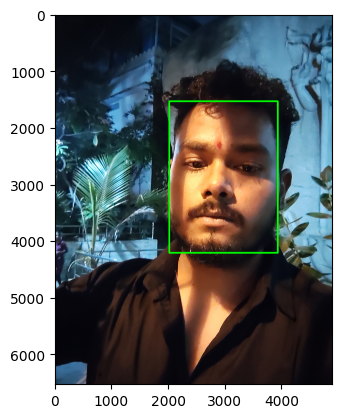

In [63]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 30)
plt.imshow(img)

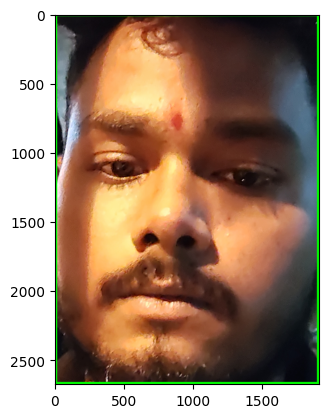

In [64]:
my_face = img[y:y+h, x:x+w]
# fACENET TAKES AS INPUT 160x160
plt.imshow(my_face)

In [65]:
my_face

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

Automate the Preprocessing

In [66]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [67]:
faceloading = FACELOADING("/content/drive/MyDrive/Face_recognition/Datasets")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 33ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 10
3/3 [==============================] - 0s 31ms/step
Loaded successfully: 10


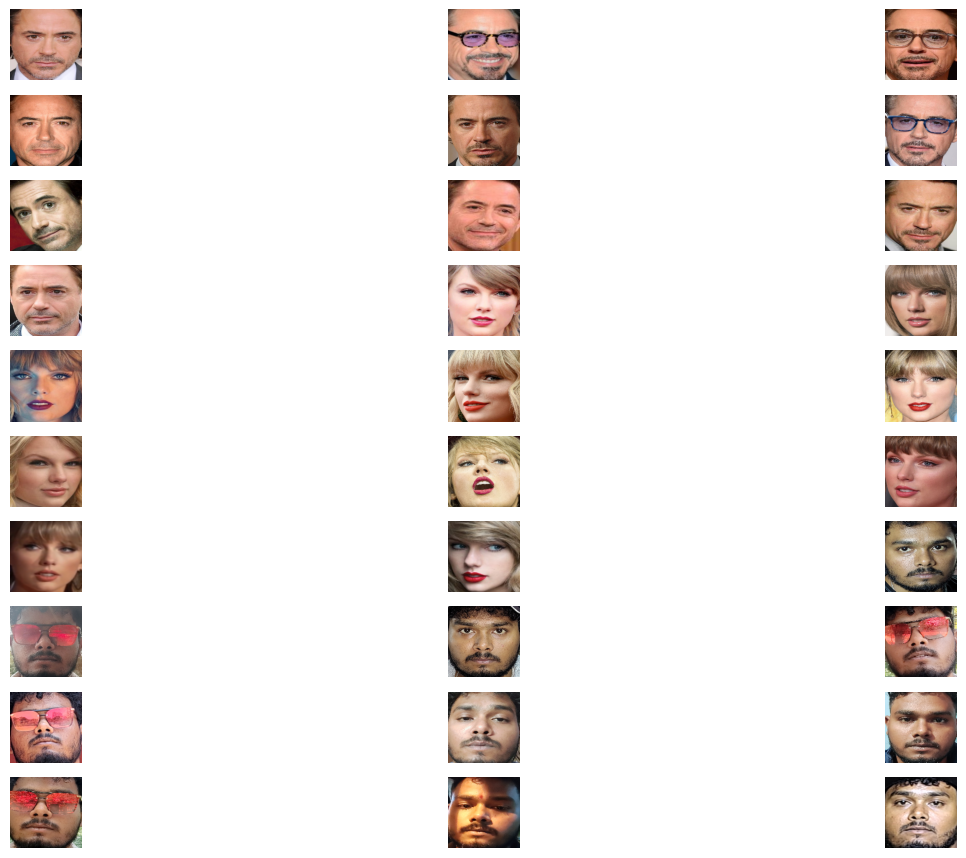

In [68]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

Face Net Parts

In [69]:
!pip install keras-facenet

In [70]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [71]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 136ms/step


In [72]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [73]:
Y

array(['Robert d j', 'Robert d j', 'Robert d j', 'Robert d j',
       'Robert d j', 'Robert d j', 'Robert d j', 'Robert d j',
       'Robert d j', 'Robert d j', 'Tylor', 'Tylor', 'Tylor', 'Tylor',
       'Tylor', 'Tylor', 'Tylor', 'Tylor', 'Tylor', 'Tylor', 'Sumit',
       'Sumit', 'Sumit', 'Sumit', 'Sumit', 'Sumit', 'Sumit', 'Sumit',
       'Sumit', 'Sumit'], dtype='<U10')

SVM Model

In [74]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '0')

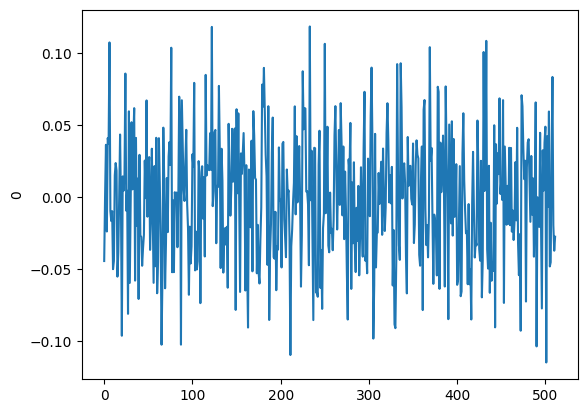

In [75]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [76]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [78]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [79]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [81]:
accuracy_score(Y_test,ypreds_test)

1.0

In [82]:
t_im = cv.imread("/content/drive/MyDrive/Face_recognition/Datasets/Sumit/IMG_20240223_224223577_BURST000_COVER.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 39ms/step


In [83]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 81ms/step


In [84]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [85]:
ypreds

array([1])

In [86]:
encoder.inverse_transform(ypreds)

array(['Sumit'], dtype='<U10')

In [87]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
# Here we have successfully serialize the code...

# New Section

In [88]:
# face recognition part II

#IMPORT

import cv2 as cv
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import pickle
from keras_facenet import FaceNet

#INITIALIZE

facenet = FaceNet()
faces_embeddings = np.load("/content/faces_embeddings_done_4classes.npz")
Y = faces_embeddings['arr_1']
encoder = LabelEncoder()
encoder.fit(Y)
haarcascade = cv.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
model = pickle.load(open("/content/svm_model_160x160.pkl", 'rb'))

cap = cv.VideoCapture(0)
# WHILE LOOP

while cap.isOpened():
    _, frame = cap.read()
    rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)

    for x,y,w,h in faces:
        img = rgb_img[y:y+h, x:x+w]
        img = cv.resize(img, (160,160)) # 1x160x160x3
        img = np.expand_dims(img,axis=0)
        ypred = facenet.embeddings(img)
        face_name = model.predict(ypred)
        final_name = encoder.inverse_transform(face_name)[0]
        cv.rectangle(frame, (x,y), (x+w,y+h), (255,0,255), 10)
        cv.putText(frame, str(final_name), (x,y-10), cv.FONT_HERSHEY_SIMPLEX,
                   1, (0,0,255), 3, cv.LINE_AA)

    cv.imshow("Face Recognition:", frame)
    if cv.waitKey(1) & ord('q') ==27:
        break

cap.release()
cv.destroyAllWindows

<function destroyAllWindows>